In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets
import matplotlib.patches as mpatches

In [2]:
def euclidian_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

In [3]:
def gauss_kernel(u):
    return( ((2* math.pi)**( -0.5)) * math.exp(-0.5*u*u))

In [4]:
def nadaraya_watson(x, y, h, kernel, distance=euclidian_distance):
    n = x.size
    a = np.zeros(n)
    
    for i in range(n):
        w = np.zeros(n)
        for j in range(n):
            w[j] = kernel(distance(x[i], x[j]) / h)
        a[i] = sum(w * y) / sum(w)
        
    return a

In [18]:
x = np.linspace(1, 4 * math.pi, 100)
y = np.sin(x) + np.log(x) + 0.3 * np.random.randn(100)

In [19]:
yr = nadaraya_watson(x, y, h=0.6, kernel=gauss_kernel)

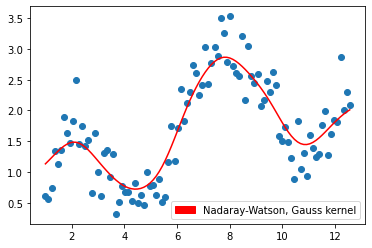

In [21]:
plt.scatter(x,y)
plt.plot(x, yr, label='y pred', color = "red")

plt.legend(handles=[mpatches.Patch(color='red', label='Nadaray-Watson, Gauss kernel')])